# Machine Learning (Classification)

## 1) import libraries

In [1]:
import pickle
import pixiedust
import sklearn
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

Pixiedust database opened successfully


## 2) read csv
##### note: public access expires in Jan 2022

In [2]:
github_data_csv = 'https://github.com/ibm-best-team/shopper-intention/raw/master/refined_cleansed_data.csv'
raw_df = pixiedust.sampleData(github_data_csv)

Downloaded 1617956 bytes
Creating pandas DataFrame for 'https://github.com/ibm-best-team/shopper-intention/raw/master/refined_cleansed_data.csv'. Please wait...
Loading file using 'pandas'
Successfully created pandas DataFrame for 'https://github.com/ibm-best-team/shopper-intention/raw/master/refined_cleansed_data.csv'


## 3) understand data

In [3]:
raw_df.shape

(12330, 20)

In [4]:
list(raw_df.columns)

['Admin_Pages_Visited',
 'Admin_Pages_Visited_Duration',
 'Site_Info_Pages_Visited',
 'Site_Info_Pages_Visited_Duration',
 'Product_Pages_Visited',
 'Product_Pages_Visited_Duration',
 'Average_Bounce_Rate',
 'Average_Exit_Rates',
 'Average_Page_Value',
 'Proximity_To_Special_Day',
 'Month',
 'OS_Type',
 'Browser_Type',
 'Region',
 'Traffic_Type',
 'Visitor_Type',
 'Weekend',
 'Sales_Conversion',
 'Special_Day',
 'New_Returning_Others']

In [5]:
raw_df.describe()

,Admin_Pages_Visited,Admin_Pages_Visited_Duration,Site_Info_Pages_Visited,Site_Info_Pages_Visited_Duration,Product_Pages_Visited,Product_Pages_Visited_Duration,Average_Bounce_Rate,Average_Exit_Rates,Average_Page_Value,Proximity_To_Special_Day,OS_Type,Browser_Type,Region,Traffic_Type,Weekend,Sales_Conversion,Special_Day,New_Returning_Others
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,0.232603,0.154745,0.012490,0.869505
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,0.422509,0.361676,0.111062,0.356740
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000,1.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,1.000000,2.000000


## 4) data cleansing

In [6]:
# One-Hot Encoding, using pandas get_dummies
hot_raw_df = pd.get_dummies(raw_df)

In [7]:
hot_raw_df.shape

(12330, 31)

In [8]:
list(hot_raw_df.columns)

['Admin_Pages_Visited',
 'Admin_Pages_Visited_Duration',
 'Site_Info_Pages_Visited',
 'Site_Info_Pages_Visited_Duration',
 'Product_Pages_Visited',
 'Product_Pages_Visited_Duration',
 'Average_Bounce_Rate',
 'Average_Exit_Rates',
 'Average_Page_Value',
 'Proximity_To_Special_Day',
 'OS_Type',
 'Browser_Type',
 'Region',
 'Traffic_Type',
 'Weekend',
 'Sales_Conversion',
 'Special_Day',
 'New_Returning_Others',
 'Month_Aug',
 'Month_Dec',
 'Month_Feb',
 'Month_Jul',
 'Month_June',
 'Month_Mar',
 'Month_May',
 'Month_Nov',
 'Month_Oct',
 'Month_Sep',
 'Visitor_Type_New_Visitor',
 'Visitor_Type_Other',
 'Visitor_Type_Returning_Visitor']

In [9]:
hot_raw_df.describe()

,Admin_Pages_Visited,Admin_Pages_Visited_Duration,Site_Info_Pages_Visited,Site_Info_Pages_Visited_Duration,Product_Pages_Visited,Product_Pages_Visited_Duration,Average_Bounce_Rate,Average_Exit_Rates,Average_Page_Value,Proximity_To_Special_Day,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Visitor_Type_New_Visitor,Visitor_Type_Other,Visitor_Type_Returning_Visitor
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,...,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,...,0.035036,0.023358,0.154663,0.272830,0.243147,0.044526,0.036334,0.137388,0.006894,0.855718
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,...,0.183880,0.151043,0.361598,0.445432,0.429000,0.206268,0.187128,0.344271,0.082745,0.351390
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
hot_raw_df.iloc[:,:18].head(10)

,Admin_Pages_Visited,Admin_Pages_Visited_Duration,Site_Info_Pages_Visited,Site_Info_Pages_Visited_Duration,Product_Pages_Visited,Product_Pages_Visited_Duration,Average_Bounce_Rate,Average_Exit_Rates,Average_Page_Value,Proximity_To_Special_Day,OS_Type,Browser_Type,Region,Traffic_Type,Weekend,Sales_Conversion,Special_Day,New_Returning_Others
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,1,1,1,1,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2,2,1,2,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,4,1,9,3,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,3,2,2,4,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,3,3,1,4,1,0,0,1
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,2,1,3,0,0,0,1
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,2,4,3,3,0,0,0,1
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,1,2,1,5,1,0,0,1
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,2,2,2,3,0,0,0,1
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,2,4,1,2,0,0,0,1


## 5) set data features and target(s)

In [11]:
target_column = 'Sales_Conversion'
target = hot_raw_df[target_column]
features = hot_raw_df.drop(target_column, axis=1)
features_columns = list(features.columns)

# for comparison of performance of all machine learning data models
comparison_matrix = []
comparison_matrix_columns = ['model', 'precision_0', 'precision_1', 'accuracy', 'mean_abs_err', 'predicted target']

## 6) set training and testing sets

In [12]:
session_random_state = 19
session_test_size = 0.30

# stage 1 = train (features, target)
# stage 2 = test (features, target)
train_features, test_features, train_target, test_target = \
    train_test_split(features, target, test_size=session_test_size, random_state=session_random_state)

print (train_features.shape, train_target.shape)
print (test_features.shape, test_target.shape)

(8631, 30) (8631,)
(3699, 30) (3699,)


## 7) train data model using random forest classifier
Hyperparameters of random forest classifier:
* n_estimators (100)
* max_depth (None)
* min_samples_split (2)
* min_samples_leaf (1)
* max_features ('auto', 'sqrt', 'log2', 'None')
* max_leaf_nodes
* max_samples


### stage 1 - training

In [13]:
rfc = RandomForestClassifier(n_estimators=200, n_jobs=2, random_state=session_random_state)
rfc.fit(train_features, train_target)

RandomForestClassifier(n_estimators=200, n_jobs=2, random_state=19)

### stage 2 - testing

In [14]:
predictions = rfc.predict(test_features)

# create confusion matrix to gut check model
confusion_matrix = pd.crosstab(test_target, predictions, rownames=['Actual Result'], colnames=['Predicted Result'])
print(confusion_matrix)

Predicted Result     0    1
Actual Result              
0                 3036  103
1                  258  302


In [15]:
# confusion matrix, again
print(metrics.confusion_matrix(test_target, predictions))

[[3036  103]
 [ 258  302]]


### stage 3 - summary

In [16]:
# classification report
print(metrics.classification_report(test_target, predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3139
           1       0.75      0.54      0.63       560

    accuracy                           0.90      3699
   macro avg       0.83      0.75      0.78      3699
weighted avg       0.90      0.90      0.90      3699



In [17]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy: {:0.6f}".format(metrics.accuracy_score(test_target, predictions)))

Accuracy: 0.902406


In [18]:
Success_Rate_0 = confusion_matrix[0][0] / confusion_matrix[0].sum() * 100
Success_Rate_1 = confusion_matrix[1][1] / confusion_matrix[1].sum() * 100
print('Success_Rate_0: {:0.4f} %\nSuccess_Rate_1: {:0.4f} %'.format(Success_Rate_0, Success_Rate_1))

Success_Rate_0: 92.1676 %
Success_Rate_1: 74.5679 %


In [19]:
# Calculate the absolute errors
errors = abs(predictions - test_target)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(float(np.mean(errors)), 6), 'degrees.')

Mean Absolute Error: 0.097594 degrees.


In [20]:
# Get numerical feature importances
importances = list(rfc.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 6)) for feature, importance in zip(features_columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:40} Importance: {:0.6f}'.format(*pair)) for pair in feature_importances];

Variable: Average_Page_Value                       Importance: 0.352789
Variable: Average_Exit_Rates                       Importance: 0.090436
Variable: Product_Pages_Visited_Duration           Importance: 0.086523
Variable: Product_Pages_Visited                    Importance: 0.074728
Variable: Average_Bounce_Rate                      Importance: 0.057212
Variable: Admin_Pages_Visited_Duration             Importance: 0.056329
Variable: Admin_Pages_Visited                      Importance: 0.043456
Variable: Traffic_Type                             Importance: 0.031537
Variable: Region                                   Importance: 0.030841
Variable: Site_Info_Pages_Visited_Duration         Importance: 0.028109
Variable: Month_Nov                                Importance: 0.022403
Variable: Browser_Type                             Importance: 0.019923
Variable: OS_Type                                  Importance: 0.019031
Variable: Site_Info_Pages_Visited                  Importance: 0

In [21]:
# alternative method - feature importance
feature_imp = pd.Series(rfc.feature_importances_, index=features_columns).sort_values(ascending=False)
print(feature_imp)

Average_Page_Value                  0.352789
Average_Exit_Rates                  0.090436
Product_Pages_Visited_Duration      0.086523
Product_Pages_Visited               0.074728
Average_Bounce_Rate                 0.057212
Admin_Pages_Visited_Duration        0.056329
Admin_Pages_Visited                 0.043456
Traffic_Type                        0.031537
Region                              0.030841
Site_Info_Pages_Visited_Duration    0.028109
Month_Nov                           0.022403
Browser_Type                        0.019923
OS_Type                             0.019031
Site_Info_Pages_Visited             0.017713
Weekend                             0.010952
Month_May                           0.006707
Month_Dec                           0.006324
Visitor_Type_Returning_Visitor      0.005973
New_Returning_Others                0.005461
Visitor_Type_New_Visitor            0.005199
Month_Mar                           0.005118
Month_Sep                           0.004565
Month_Oct 

In [22]:
# compile results
model_name = 'randomforestclassifier'
results = [model_name,
           metrics.precision_score(test_target, predictions, pos_label=0),
           metrics.precision_score(test_target, predictions, pos_label=1),
           metrics.accuracy_score(test_target, predictions),
           metrics.mean_absolute_error(test_target, predictions),
           predictions,
           ]
comparison_matrix.append(results)

In [23]:
def do_confusion_matrix(_test, _pred):
    print('<confusion matrix>', metrics.confusion_matrix(_test, _pred), sep='\n')
    _tmp_0 = metrics.precision_score(_test, _pred, pos_label=0)
    _tmp_1 = metrics.precision_score(_test, _pred, pos_label=1)
    print('Precision for "0" : {:0.4f}\nPrecision for "1" : {:0.4f}'.format(_tmp_0, _tmp_1))
    metrics.ConfusionMatrixDisplay.from_predictions(_test, _pred, cmap='binary')

def do_classification_report(_test, _pred):
    print('<classification report>')
    print(metrics.classification_report(_test, _pred, digits=4))

    _format_string = '{:20} : {:0.4f}'

    _temp = metrics.accuracy_score(_test, _pred)
    print(_format_string.format('accuracy score', _temp))

    _temp = metrics.mean_absolute_error(_test, _pred)
    print(_format_string.format('mean absolute error', _temp))

    _temp = metrics.completeness_score(_test, _pred)
    print(_format_string.format('completeness score', _temp))

## 8) Sample Deployment

In [24]:
import random
random.seed(5)

def random_data_generator(_data_size=1):
    _traffic = []
    for _ in range(_data_size):
        _result = []
        # Admin_Pages_Visited
        _result.append(random.randint(0, 27))
        # _result.append(0)
        # Admin_Pages_Visited_Duration
        _result.append(random.randint(0, 3398))
        # _result.append(0)
        # Site_Info_Pages_Visited
        _result.append(random.randint(0, 24))
        # _result.append(0)
        # Site_Info_Pages_Visited_Duration
        _result.append(random.randint(0, 2549))
        # _result.append(0)
        # Product_Pages_Visited
        _result.append(random.randint(0, 705))
        # Product_Pages_Visited_Duration
        _result.append(random.randint(0, 63973))
        # Average_Bounce_Rate
        _result.append(round(random.uniform(0, 0.2), 5))
        # Average_Exit_Rates
        _result.append(round(random.uniform(0, 0.2), 5))
        # Average_Page_Value
        _result.append(random.randint(0, 361))
        # Proximity_To_Special_Day
        _result.append(round(random.uniform(0, 1), 5))
        # Month
        # _tmp = random.randint(0, 11)
        # _months = ['Feb', 'Mar', 'Mar', 'May', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        # _result.append(_months[_tmp])
        # OS_Type
        _result.append(random.randint(1, 8))
        # Browser_Type
        _result.append(random.randint(1, 13))
        # Region
        _result.append(random.randint(1, 9))
        # Traffic_Type
        _result.append(random.randint(1, 20))
        # Visitor_Type
        # _tmp = random.randint(0, 2)
        # _visitors = ['New_Visitor', 'Returning_Visitor', 'Other']
        # _result.append(_visitors[_tmp])
        # Weekend
        _result.append(random.randint(0, 1))
        # Special_Day
        _result.append(random.randint(0, 1))
        # New_Returning_Others
        _result.append(random.randint(0, 2))
        for _ in range(13):
            _result.append(0)
        _traffic.append(_result)
    return _traffic

deployment_data_size = 100
deployment_data = random_data_generator(deployment_data_size)
deployment_result = rfc.predict(deployment_data)
print(deployment_result)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


c:\users\keith\pycharmprojects\crypto_01\venv\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## 9) save and test saved model

In [25]:
model_filename = model_name + '.pkl'
pickle.dump(rfc, open(model_filename, 'wb'))

In [26]:
saved_rfc = pickle.load(open(model_filename, 'rb'))
deployment_result_2 = saved_rfc.predict(deployment_data)
print(deployment_result_2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


c:\users\keith\pycharmprojects\crypto_01\venv\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Naive Bayes Algorithm
Naive Bayes has almost no hyper-parameters to tune.
One thing to note is that due to the feature independence assumption, the class probabilities output by naive Bayes can be pretty inaccurate.
So if your end application requires precise estimates of probabilities, you will want to go with another algorithm.

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB

# naive_bayes_models = ['GaussianNB', 'BernoulliNB', 'ComplementNB', 'CategoricalNB', 'MultinomialNB']
naive_bayes_models = ['GaussianNB', 'BernoulliNB', 'MultinomialNB', 'ComplementNB']

for _model in naive_bayes_models:
    if _model == 'GaussianNB':
        data_model = GaussianNB()
    elif _model == 'BernoulliNB':
        data_model = BernoulliNB()
    elif _model == 'ComplementNB':
        data_model = ComplementNB()
    elif _model == 'CategoricalNB':
        data_model = CategoricalNB()
    elif _model == 'MultinomialNB':
        data_model = MultinomialNB()
    else:
        data_model = BernoulliNB()

    # train data model
    data_model.fit(train_features, train_target)
    # test trained model
    predict_target = data_model.predict(test_features)

    # compile results
    results = [_model,
               metrics.precision_score(test_target, predict_target, pos_label=0),
               metrics.precision_score(test_target, predict_target, pos_label=1),
               metrics.accuracy_score(test_target, predict_target),
               metrics.mean_absolute_error(test_target, predict_target),
               predict_target,
               ]
    comparison_matrix.append(results)

    # save model
    model_filename = _model + '.pkl'
    pickle.dump(data_model, open(model_filename, 'wb'))


In [28]:
comparison_matrix_df = pd.DataFrame(comparison_matrix, columns=comparison_matrix_columns)
comparison_matrix_df = comparison_matrix_df.drop('predicted target', axis=1)
print(comparison_matrix_df)

                    model  precision_0  precision_1  accuracy  mean_abs_err
0  randomforestclassifier     0.921676     0.745679  0.902406      0.097594
1              GaussianNB     0.926095     0.340782  0.756150      0.243850
2             BernoulliNB     0.926354     0.502235  0.849419      0.150581
3           MultinomialNB     0.928074     0.613260  0.881860      0.118140
4            ComplementNB     0.930990     0.604569  0.880779      0.119221


## Support Vector Machine (SVM)
Hyperparameters of SVM:
* kernel
* gamma
* cost

In [29]:
from sklearn import svm

# svm_models = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
svm_kernels = ['linearSVM', 'polySVM', 'rbfSVM', 'sigmoidSVM']

for _kernel in svm_kernels:
    if _kernel == 'linearSVM':
        data_model = svm.SVC(kernel='linear', random_state=session_random_state)
    elif _kernel == 'polySVM':
        data_model = svm.SVC(kernel='poly', random_state=session_random_state)
    elif _kernel == 'rbfSVM':
        data_model = svm.SVC(kernel='rbf', random_state=session_random_state)
    elif _kernel == 'sigmoidSVM':
        data_model = svm.SVC(kernel='sigmoid', random_state=session_random_state)
    elif _kernel == 'precomputedSVM':
        data_model = svm.SVC(kernel='precomputed', random_state=session_random_state)
    else:
        data_model = svm.SVC(kernel='linear', random_state=session_random_state)

    # train data model
    data_model.fit(train_features, train_target)
    # test trained model
    predict_target = data_model.predict(test_features)

    # compile results
    results = [_kernel,
               metrics.precision_score(test_target, predict_target, pos_label=0),
               metrics.precision_score(test_target, predict_target, pos_label=1),
               metrics.accuracy_score(test_target, predict_target),
               metrics.mean_absolute_error(test_target, predict_target),
               predict_target,
               ]
    comparison_matrix.append(results)

    # save model
    model_filename = _kernel + '.pkl'
    pickle.dump(data_model, open(model_filename, 'wb'))


In [31]:
comparison_matrix_df = pd.DataFrame(comparison_matrix, columns=comparison_matrix_columns)
comparison_matrix_df = comparison_matrix_df.drop('predicted target', axis=1)
print(comparison_matrix_df)

                    model  precision_0  precision_1  accuracy  mean_abs_err
0  randomforestclassifier     0.921676     0.745679  0.902406      0.097594
1              GaussianNB     0.926095     0.340782  0.756150      0.243850
2             BernoulliNB     0.926354     0.502235  0.849419      0.150581
3           MultinomialNB     0.928074     0.613260  0.881860      0.118140
4            ComplementNB     0.930990     0.604569  0.880779      0.119221
5               linearSVM     0.897929     0.777778  0.889159      0.110841
6                 polySVM     0.849702     0.461538  0.848337      0.151663
7                  rbfSVM     0.850217     1.000000  0.850500      0.149500
8              sigmoidSVM     0.863987     0.232598  0.763450      0.236550


## Ensemble Gradient Boosting (Classification)
Boosting is a special type of Ensemble Learning technique that works by combining several weak learners(predictors with poor accuracy)
into a strong learner(a model with strong accuracy). This works by each model paying attention to its predecessor’s mistakes.
(1) Adaptive Boosting
(2) Gradient Boosting

####
#### Gradient Boosting
The learning_rate is a hyperparameter that is used to scale each trees contribution, sacrificing bias for better variance.
In other words, we multiply this number by the predicted value so that we do not over-fit the data.

* Criterion: The loss function used to find the optimal feature and threshold to split the data
* learning_rate: this parameter scales the contribution of each tree
* max_depth: the maximum depth of each tree
* n_estimators: the number of trees to construct
* init: the initial estimator. By default, it is the log(odds) converted to a probability(like we discussed before)


In [32]:
from sklearn.ensemble import GradientBoostingClassifier

data_model = GradientBoostingClassifier(learning_rate=0.1)
data_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [33]:
learning_rates = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for _learning_rate in learning_rates:
    # define data model
    data_model = GradientBoostingClassifier(learning_rate=_learning_rate, random_state=session_random_state)

    # train data model
    data_model.fit(train_features, train_target)
    # test trained model
    predict_target = data_model.predict(test_features)

    _model_name = str(_learning_rate) + 'GBC'
    # compile results
    results = [_model_name,
               metrics.precision_score(test_target, predict_target, pos_label=0),
               metrics.precision_score(test_target, predict_target, pos_label=1),
               metrics.accuracy_score(test_target, predict_target),
               metrics.mean_absolute_error(test_target, predict_target),
               predict_target,
               ]
    comparison_matrix.append(results)

    # save model
    model_filename = _model_name + '.pkl'
    pickle.dump(data_model, open(model_filename, 'wb'))

In [34]:
comparison_matrix_df = pd.DataFrame(comparison_matrix, columns=comparison_matrix_columns)
comparison_matrix_df = comparison_matrix_df.drop('predicted target', axis=1)
print(comparison_matrix_df)

                     model  precision_0  precision_1  accuracy  mean_abs_err
0   randomforestclassifier     0.921676     0.745679  0.902406      0.097594
1               GaussianNB     0.926095     0.340782  0.756150      0.243850
2              BernoulliNB     0.926354     0.502235  0.849419      0.150581
3            MultinomialNB     0.928074     0.613260  0.881860      0.118140
4             ComplementNB     0.930990     0.604569  0.880779      0.119221
5                linearSVM     0.897929     0.777778  0.889159      0.110841
6                  polySVM     0.849702     0.461538  0.848337      0.151663
7                   rbfSVM     0.850217     1.000000  0.850500      0.149500
8               sigmoidSVM     0.863987     0.232598  0.763450      0.236550
9                  0.05GBC     0.928593     0.728889  0.904298      0.095702
10                0.075GBC     0.930491     0.725108  0.904839      0.095161
11                  0.1GBC     0.929852     0.719222  0.903487      0.096513

In [35]:
# save comparison matrix
comparison_matrix_df.to_csv('model comparison.csv', mode='a', header=True)

## Evaluate model with highest efficacy


In [64]:
reference_model = 'randomforestclassifier'
chosen_model = '0.05GBC'

reference_result = comparison_matrix[0][-1]
evaluation_result = comparison_matrix[9][-1]

In [65]:
do_classification_report(test_target, reference_result)

<classification report>
              precision    recall  f1-score   support

           0     0.9217    0.9672    0.9439      3139
           1     0.7457    0.5393    0.6259       560

    accuracy                         0.9024      3699
   macro avg     0.8337    0.7532    0.7849      3699
weighted avg     0.8950    0.9024    0.8957      3699

accuracy score       : 0.9024
mean absolute error  : 0.0976
completeness score   : 0.3429


In [66]:
do_classification_report(test_target, evaluation_result)

<classification report>
              precision    recall  f1-score   support

           0     0.9286    0.9611    0.9446      3139
           1     0.7289    0.5857    0.6495       560

    accuracy                         0.9043      3699
   macro avg     0.8287    0.7734    0.7970      3699
weighted avg     0.8984    0.9043    0.8999      3699

accuracy score       : 0.9043
mean absolute error  : 0.0957
completeness score   : 0.3459


<confusion matrix>
[[3036  103]
 [ 258  302]]
Precision for "0" : 0.9217
Precision for "1" : 0.7457


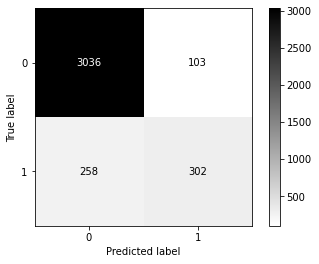

In [67]:
do_confusion_matrix(test_target, reference_result)

<confusion matrix>
[[3017  122]
 [ 232  328]]
Precision for "0" : 0.9286
Precision for "1" : 0.7289


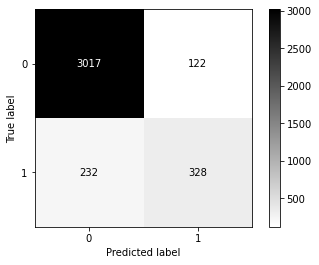

In [68]:
do_confusion_matrix(test_target, evaluation_result)

### End of Notebook